# Proyección quincuncial: Implementación numérica en Python

El propósito de este documento es presentar una visualización numérica en Python del mapa del planeta Tierra mediante la proyección quincuncial de Peirce (Solanilla, Oostra, Yáñez, 2016). Para lograr esto, se emplea el archivo "quincuncial.py", que contiene el código relacionado con dicha proyección, así como el archivo "toolbox.py", que incluye funciones auxiliares para la generación y visualización a lo largo del documento.

La proyección quincuncial de Peirce consiste en la composición de la proyección estereográfica con la integral inversa de $c_{n}$, una función elíptica de Jacobi. No obstante, en este caso se utiliza directamente la caracterización real presentada en el artículo (Th 2.4. 2016), la cual mapea las coordenadas esféricas en el plano complejo. Dicha caracterización se encuentra implementada en la función "quincuncial()" del archivo "quincuncial.py", siendo este el script más relevante del documento.

En este sentido, el cuaderno se estructura en tres secciones:

**1**. En la primera sección, se importan los archivos "quincuncial.py" y "toolbox.py" que se utilizarán en las siguientes secciones.

**2**. En la segunda parte, se generan y grafican coordenadas esféricas distribuidas a lo largo de los meridianos, paralelos y lineas costeras.

**3**. Por último, en la tercera sección, se transforman las coordenadas esféricas utilizando la función "quincuncial()" con un módulo de 1/2, para posteriormente visualizar los resultados y el plano con el mapa de la Tierra según la proyección quincuncial de Peirce.

## 1. Importe de archivos

In [1]:
from Functions.quincuncial import *
from Functions.toolbox import *
import pandas as pd

In [2]:
#https://mpmath.org/doc/current/functions/elliptic.html#ellipf
ellipf(np.pi/2, m=0.5) # Integral eliptica de Legendre de primera forma

mpf('1.8540746773013719')

## 2. Generación de coordenadas esféricas
### 2.1 Meridianos y paralelos en la esfera
A continuación se generan coordenadas esféricas distribuidas a lo largo de los meridianos y paralelos.

In [9]:
meridianos = generar_meridianos(37, 200) #(numero_de_meridianos, numero_de_puntos_por_meridiano)
paralelos = generar_paralelos(37, 200) # funciones guardadas en toolbox.py

### 2.2 Lineas costeras en la esfera terreste
En esta subsección se carga un conjunto de datos con la información geoespacial del planeta, expresado también en coordenadas esféricas. Usando estos datos, se genera una cantidad específica de puntos (num_puntos) distribuidos sobre cada país y se grafica en la esfera terrestre.

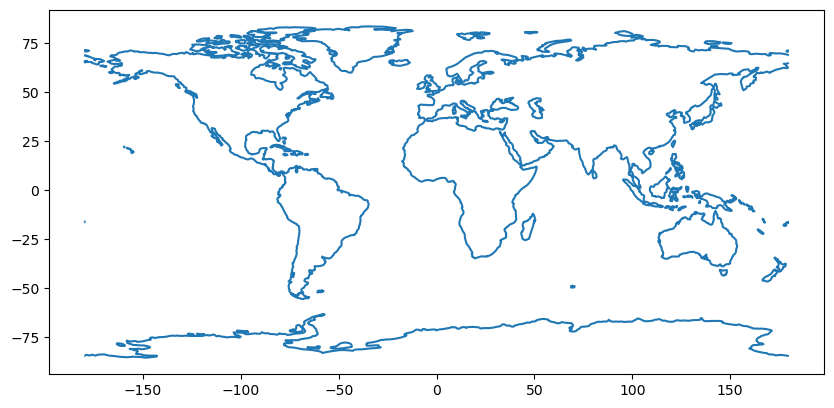

In [4]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta al archivo shapefile
ruta = "data/ne_110m_coastline/ne_110m_coastline.shp"

# Cargando el shapefile en un DataFrame de GeoPandas
gdf = gpd.read_file(ruta)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 10))

# Graficar la capa del shapefile
gdf.plot(ax=ax)

# Mostrar el gráfico
plt.show()


In [5]:
import pandas as pd
import numpy as np
from math import radians

# Crear un nuevo DataFrame
nuevo_df = pd.DataFrame(columns=['coordenadas'])


# Iterar sobre cada fila del DataFrame original
for index, row in gdf.iterrows():
    # Obtener las coordenadas del LINESTRING y convertirlas a radianes
    coordenadas = [(radians(lon)+np.pi, radians(lat)+np.pi/2) for lon, lat in row['geometry'].coords]
    # Agregar las coordenadas al nuevo DataFrame
    nuevo_df.loc[index] = [coordenadas]
# Extraer la columna 'coordenadas' como lista de parejas ordenadas
lista_parejas_ordenadas = nuevo_df['coordenadas'].tolist()

In [6]:
lista_parejas_ordenadas.append(meridianos)
#lista_parejas_ordenadas.append(paralelos)

## 3. Proyección quincuncial de Peirce
### 3.1 Meridianos y paralelos
A continuación se transforman y visualizan las coordenadas esféricas de los meridianos y paralelos según la proyección quincuncial de Peirce.


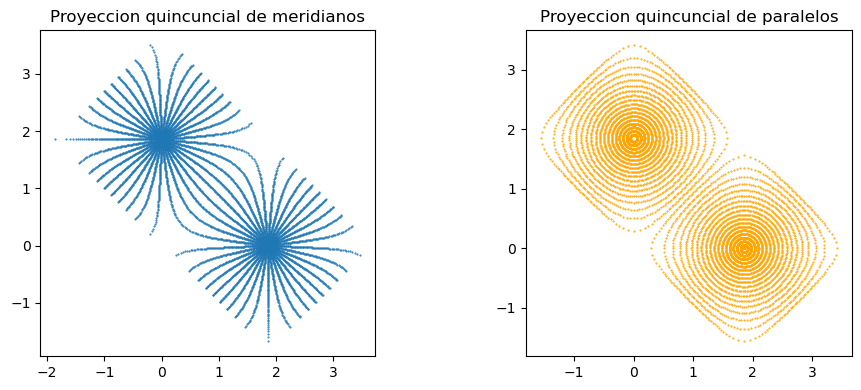

In [7]:
plot_myp(meridianos, paralelos, quincuncial) # función que transforma y grafica los meridianos y paralelos

### 3.2 Mapamundi de Peirce

Por último, se grafica en el plano complejo el mapa de la tierra producido mediante la proyección quincuncial de Peirce, junto con los meridianos.

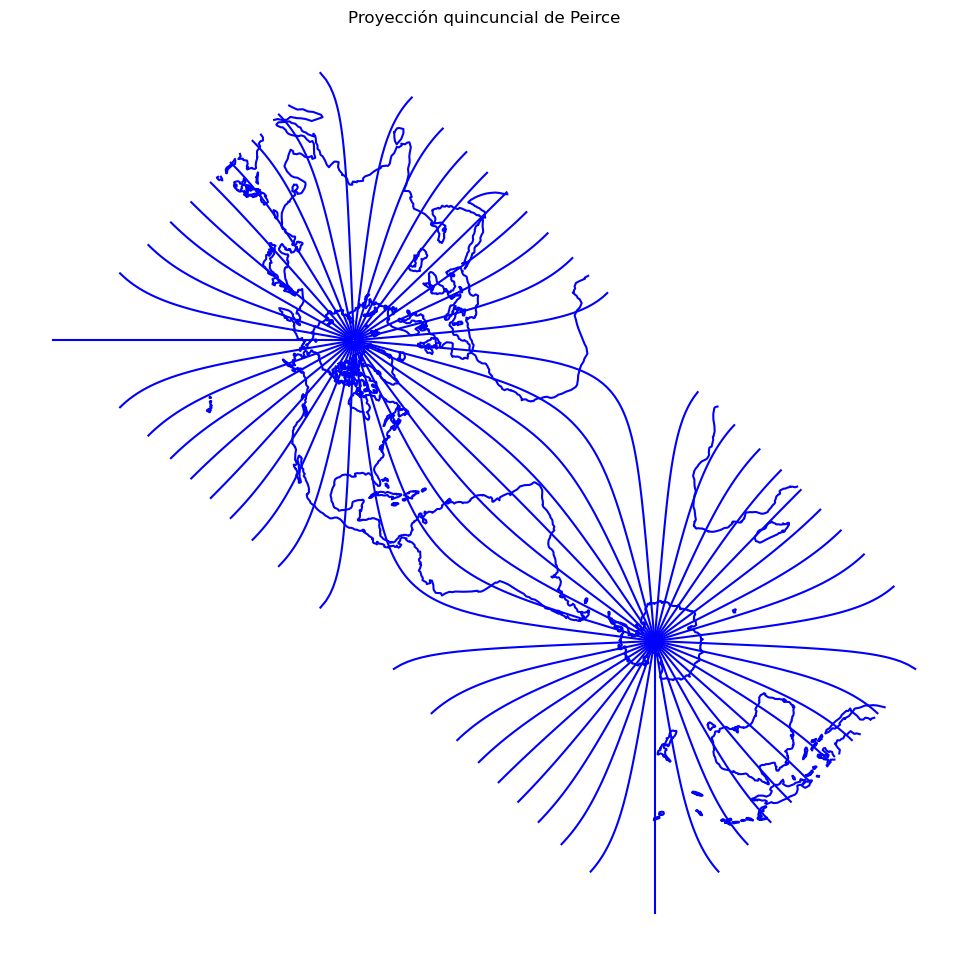

In [8]:
plot_proyeccion(lista_parejas_ordenadas, quincuncial, "Proyección quincuncial de Peirce")# función que grafica el mapamundi según la proyección quincuncial

Al igual que en el artículo citado, se hizo necesaria una transformación según el octante con el fin de asegurar la inyectividad.

## Referencias

- Solanilla, Oostra, Yáñez. Peirce quincuncial projection. Revista Integración, Escuela de Matemáticas, Universidad Industrial de Santander
Vol. 34, No. 1, 2016, pág. 23–38.

Autor: Guillermo Andrés Arboleda. gaarboledag@ut.edu.co.
